In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('wine.csv',usecols=[0,1,2])

In [4]:
df.head()

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [6]:
df.columns = ['Class label','Alcohol','Malic acid']

In [7]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [8]:
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

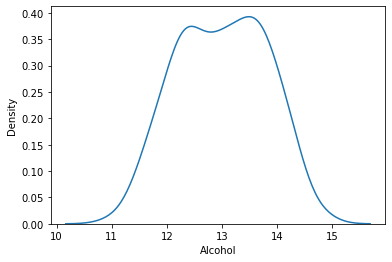

In [13]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

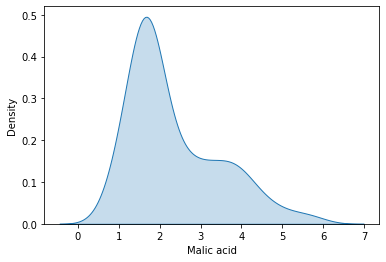

In [14]:
sns.kdeplot(df['Malic acid'],shade='fill')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

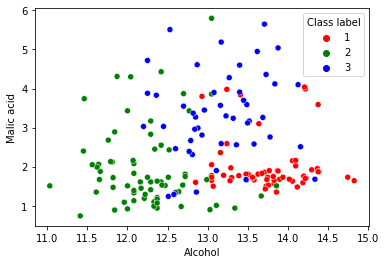

In [16]:
col_dic ={1:'red',2:'green',3:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=col_dic)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [20]:
X_train_Scaled = pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled = pd.DataFrame(X_test_Scaled,columns=X_test.columns)

In [23]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [22]:
np.round(X_train_Scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


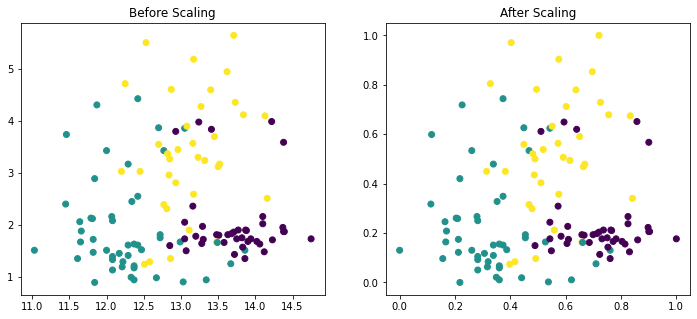

In [26]:
fig ,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_Scaled['Alcohol'],X_train_Scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

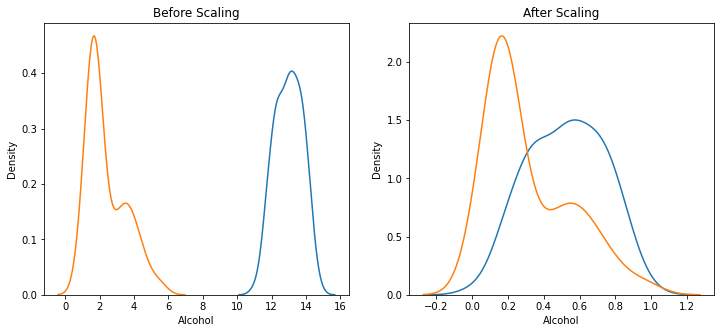

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_Scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_Scaled['Malic acid'],ax=ax2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

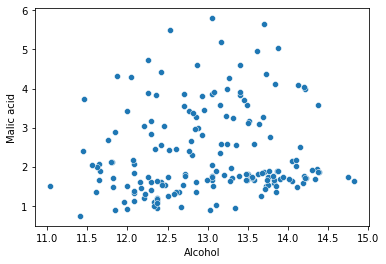

In [31]:
sns.scatterplot(df['Alcohol'],df['Malic acid'])

In [33]:
df = df.append(pd.DataFrame({'Class label':[3,1,1],'Alcohol':[2,50,67],'Malic acid':[1,20,25]}),ignore_index=True)

<ipython-input-33-276ca3549bd1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Class label':[3,1,1],'Alcohol':[2,50,67],'Malic acid':[1,20,25]}),ignore_index=True)


In [34]:
df.tail()

,Class label,Alcohol,Malic acid
176,3,13.17,2.59
177,3,14.13,4.10
178,3,2.00,1.00
179,1,50.00,20.00
180,1,67.00,25.00


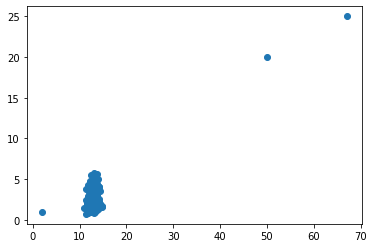

In [35]:
plt.scatter(df['Alcohol'],df['Malic acid'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)
X_train.shape,X_test.shape

((126, 2), (55, 2))

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
sd = RobustScaler()
sd.fit(X_train)

RobustScaler()

In [39]:
X_train_Scaled = sd.transform(X_train)
X_test_Scaled = sd.transform(X_test)

In [40]:
X_train_Scaled = pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled = pd.DataFrame(X_test_Scaled,columns=X_test.columns)

In [41]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,126.0,126.0
mean,13.7,2.6
std,5.9,2.8
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.7,3.0
max,67.0,25.0


In [42]:
np.round(X_train_Scaled.describe(),1)

,Alcohol,Malic acid
count,126.0,126.0
mean,0.5,0.5
std,4.4,2.0
min,-1.5,-0.8
25%,-0.5,-0.2
50%,0.0,-0.0
75%,0.5,0.8
max,40.5,16.3


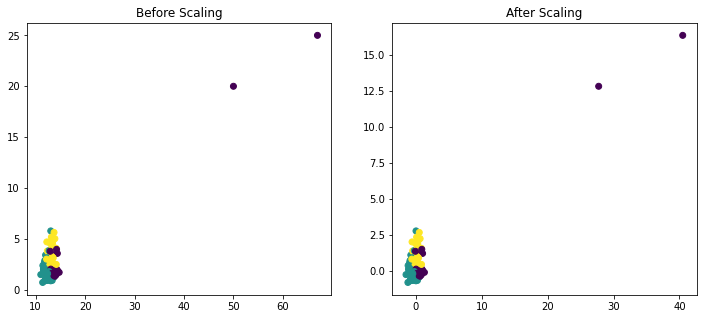

In [43]:
fig ,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_Scaled['Alcohol'],X_train_Scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

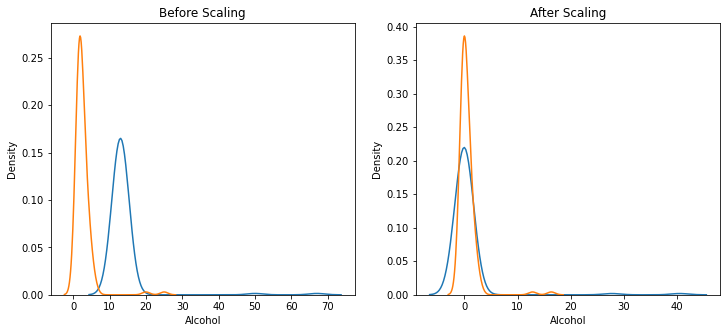

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_Scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_Scaled['Malic acid'],ax=ax2)